In [2]:
import emoji 
import json
import datetime
import re
from collections import Counter
import timeit
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "C:\\MSc\\data_tweets_with_emoji_json.txt"

In [3]:
print("Open corpus file...")
start_time = datetime.datetime.now()

with open(file_path, "r") as file:
    print("Strip corpus...")
    data = (line.strip() for line in file)
    data_json = "[{0}]".format(','.join(data))
    print("Load file as json...")
    data = json.loads(data_json)
    
end_time = datetime.datetime.now()
print("Dauer: ", end_time - start_time)

Open corpus file...
Strip corpus...
Load file as json...
Dauer:  0:00:34.332802


In [8]:
df = pd.DataFrame(data, columns=['id_str','in_reply_to_status_id_str', 'text'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392017 entries, 0 to 392016
Data columns (total 3 columns):
id_str                       392017 non-null object
in_reply_to_status_id_str    5986 non-null object
text                         392017 non-null object
dtypes: object(3)
memory usage: 9.0+ MB


In [9]:
df.head()

,id_str,in_reply_to_status_id_str,text
0,689736119580233728,None,"LoL 😂 @ West Covina, California https://t.co/y..."
1,812015924374974464,None,Things got a little festive at the office 🎄#ch...
2,801647284685373440,None,Step out and explore. #❤️ @ Ellis Island Cafe ...
3,781871095351828480,None,📸 @vinniehatestyle @ Cathedral Preparatory Sch...
4,714690241370660865,None,RuPaul's Drag Race bingo fun. Drag Queens be S...


In [10]:
def extract_chars(my_str):     
    return ''.join([c for c in my_str if not(c in emoji.UNICODE_EMOJI)])

def anonymize_username(my_str):
    anonymized_text = ['@username' if x.startswith('@') else x for x in list(my_str.split())]
    return ' '.join(anonymized_text)

def anonymize_hashtag(my_str): 
    return ' '.join(['#hashtag' if x.startswith('#') else x for x in list(my_str.split())])

def delete_links(my_str): 
    return ' '.join(['' if x.startswith('https') else x for x in list(my_str.split())])
# to do: hashtags und links entfernen

df_clean_text = df['text'].apply(lambda x: delete_links(anonymize_hashtag(anonymize_username(extract_chars(x)))))

In [11]:
def extract_emojis(my_str):
    return ''.join(c for c in my_str if c in emoji.UNICODE_EMOJI)

df_extr_emojis = df['text'].apply(lambda x: extract_emojis(x))

In [12]:
# unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

# assign all new functions to df

new_df = df.assign(clean_text = df_clean_text, extr_emojis = df_extr_emojis) # , langid = df_langid
new_df.head()

,id_str,in_reply_to_status_id_str,text,clean_text,extr_emojis
0,689736119580233728,None,"LoL 😂 @ West Covina, California https://t.co/ylNndaC0ls","LoL @username West Covina, California",😂
1,812015924374974464,None,Things got a little festive at the office 🎄#christmas2016 @ RedRock… https://t.co/mE8HmWpJ40,Things got a little festive at the office #hashtag @username RedRock…,🎄
2,801647284685373440,None,Step out and explore. #❤️ @ Ellis Island Cafe https://t.co/mVOVCPXQRQ,Step out and explore. #hashtag @username Ellis Island Cafe,❤
3,781871095351828480,None,📸 @vinniehatestyle @ Cathedral Preparatory School https://t.co/SNLPazrrk2,@username @username Cathedral Preparatory School,📸
4,714690241370660865,None,RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #rupaulsdragrace @fioelly abwyman 😘 #la… https://t.co/VC2M2uWmlp,RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #hashtag @username abwyman #hashtag,😘


In [13]:
# rows only with emoji

# len(df_emoji_rows.index) = 392017

df_emoji_rows = new_df[new_df.extr_emojis != '']
len(df_emoji_rows.index)

392017

In [14]:
# zählen der emoji vorkommen
df_emoji_rows.extr_emojis.value_counts().head(20)

❤    93270
😍    39388
😂    26317
💕    24849
😊    21511
😎    20055
📷    16379
💙    14751
✨    14616
😘    13449
📸    13414
😉    13393
☀    12532
😜    11775
🔥    11705
🎄    11438
😁    11301
💜    10965
💯    10909
Name: extr_emojis, dtype: int64

In [15]:
# percantage of TOP 20 Emoji_all

series_emoji_all_top20 = df_emoji_rows.extr_emojis.value_counts().head(20)
df_emoji_all_top20 = series_emoji_all_top20.to_frame()
df_emoji_all_top20['emoji'] = df_emoji_all_top20.index
df_emoji_all_top20['Anzahl'] = df_emoji_all_top20['extr_emojis']
df_emoji_all_top20 = df_emoji_all_top20.drop(columns = 'extr_emojis')
df_emoji_all_top20.reset_index(inplace=True)
df_emoji_all_top20 = df_emoji_all_top20.drop(columns = 'index')
df_emoji_all_top20['Prozent'] = df_emoji_all_top20['Anzahl']/df_emoji_all_top20['Anzahl'].sum() * 100
df_emoji_all_top20_transpose = df_emoji_all_top20.transpose()
df_emoji_all_top20

,emoji,Anzahl,Prozent
0,❤,93270,23.792336
1,😍,39388,10.047523
2,😂,26317,6.713229
3,💕,24849,6.338756
4,😊,21511,5.487262
5,😎,20055,5.115850
6,📷,16379,4.178135
7,💙,14751,3.762847
8,✨,14616,3.728410
9,😘,13449,3.430719


In [16]:
df_emoji_all_top20['Anzahl'].sum()

392017

In [18]:
# changing matplotlib font

# Along with matplotlib.pyplot, for this one
# you also need to import matplotlib itself
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Segoe UI Emoji"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

Text(0,0.5,'Anzahl')

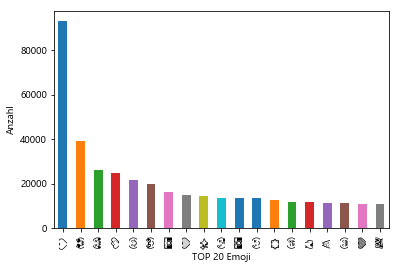

In [19]:
# vorkommen aller emoji
df_emoji_rows.extr_emojis.value_counts().head(20).plot.bar()
plt.xlabel('TOP 19 Emoji')
plt.ylabel('Anzahl')

plt.savefig('df_barbieri_vorkommen_emoji_alle.pdf', bbox_inches='tight')

In [20]:
# get initial and response emoji

df_emoji = df_emoji_rows.copy()
#df_emoji['in_reply_to_user_id_str'] = df_emoji['in_reply_to_user_id_str'].dropna().astype(np.int64)

df_initial_tweets = df_emoji[df_emoji['in_reply_to_status_id_str'].isnull()] # tweets without reply_id
df_response_tweets = df_emoji[~df_emoji['in_reply_to_status_id_str'].isnull()] # tweets with reply_id

# transform datatype in "in_reply_to_user_id_str" from numpy.float64 to np.int64
#df_emoji['in_reply_to_user_id_str'].dropna().astype(np.int64)
conversations = []
for reply_id in df_response_tweets['in_reply_to_status_id_str']:
    if (df_initial_tweets['id_str'] == reply_id).any():
        
        #print('intial: ', df_initial_tweets[df_initial_tweets['id_str']== reply_id]['extr_emojis'])
        initial = df_initial_tweets[df_initial_tweets['id_str']== reply_id]['extr_emojis']

        #print('response :', df_response_tweets[df_response_tweets['in_reply_to_user_id_str']== reply_id]['extr_emojis'])
        response = df_response_tweets[df_response_tweets['in_reply_to_status_id_str']== reply_id]['extr_emojis']

        
        tupl = (initial, response)
        conversations.append(tupl)
print('Done.')

Done.


In [21]:
df_wip = pd.DataFrame.from_records(conversations, columns=['initial', 'response'])
df_wip['initial']= df_wip['initial'].astype(str)
df_wip['response']= df_wip['response'].astype(str)

def extract_emojis(my_str):
    return ''.join(c for c in my_str if c in emoji.UNICODE_EMOJI)


df_extr_emojis_initial = df_wip['initial'].apply(lambda x: extract_emojis(x))
df_extr_emojis_response = df_wip['response'].apply(lambda x: extract_emojis(x))
df_conv = df_wip.assign(extr_emojis_initial = df_extr_emojis_initial, extr_emojis_response = df_extr_emojis_response)


In [23]:
df_conv

,initial,response,extr_emojis_initial,extr_emojis_response
0,"20351 ❤\nName: extr_emojis, dtype: object","68693 ❤\nName: extr_emojis, dtype: object",❤,❤
1,"294608 ❤\nName: extr_emojis, dtype: object","349598 ❤\nName: extr_emojis, dtype: object",❤,❤
